# Data Exploration

Zusammensetzten von daten der ersten. Datum als Wochentag. SID, PID und Category zusammen. <br>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Read in the data
df = pd.read_csv("../../Data/Raw/inventory_management.csv")

In [ ]:
# create overview from data

from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.platypus import Table, TableStyle

def create_wrapped_pdf_from_df(df, output_filename, num_rows=5, max_cols=7):
    df_head = df.head(num_rows)
    n_cols = len(df_head.columns)
    pdf_canvas = canvas.Canvas(output_filename, pagesize=letter)
    y_position = 750  # Start near the top of the page

    for start_col in range(0, n_cols, max_cols):
        end_col = min(start_col + max_cols, n_cols)
        sub_df = df_head.iloc[:, start_col:end_col]
        data_list = [sub_df.columns.tolist()] + sub_df.values.tolist()
        table = Table(data_list)
        style = TableStyle([
            ('BACKGROUND', (0, 0), (-1, 0), colors.white),
            ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 8),
            ('GRID', (0, 0), (-1, -1), 0.5, colors.black)
        ])
        table.setStyle(style)
        table_width, table_height = table.wrapOn(pdf_canvas, 0, 0)
        table.drawOn(pdf_canvas, 30, y_position - table_height)
        y_position -= (table_height + 20)  # Move down for next table

    pdf_canvas.save()

# Usage:
create_wrapped_pdf_from_df(df, "df_overview_wrapped.pdf", num_rows=10, max_cols=10)

In [4]:
# create overview from data

from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.platypus import Table, TableStyle
df2 = df
df = df.iloc[20:]

def create_wrapped_pdf_from_df(df, output_filename, num_rows=5, max_cols=7):
    df_head = df.head(num_rows)
    n_cols = len(df_head.columns)
    pdf_canvas = canvas.Canvas(output_filename, pagesize=letter)
    y_position = 750  # Start near the top of the page

    for start_col in range(0, n_cols, max_cols):
        end_col = min(start_col + max_cols, n_cols)
        sub_df = df_head.iloc[:, start_col:end_col]
        data_list = [sub_df.columns.tolist()] + sub_df.values.tolist()
        table = Table(data_list)
        style = TableStyle([
            ('BACKGROUND', (0, 0), (-1, 0), colors.white),
            ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 0), (-1, -1), 8),
            ('GRID', (0, 0), (-1, -1), 0.5, colors.black)
        ])
        table.setStyle(style)
        table_width, table_height = table.wrapOn(pdf_canvas, 0, 0)
        table.drawOn(pdf_canvas, 30, y_position - table_height)
        y_position -= (table_height + 20)  # Move down for next table

    pdf_canvas.save()

# Usage:
create_wrapped_pdf_from_df(df, "df_overview_wrapped_2.pdf", num_rows=10, max_cols=10)

df = df2

In [14]:
# get a first look on the data
display(df.head())

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


We have 16 diffrent columns it is a lot. Lets get more insights

In [15]:
# Show basic info and summary statistics
print("Data Information:")
df.info()
print("\nSummary Statistics:")
display(df.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1722 non-null   object 
 1   Store ID            1722 non-null   object 
 2   Product ID          1722 non-null   object 
 3   Category            1722 non-null   object 
 4   Region              1722 non-null   object 
 5   Inventory Level     1722 non-null   int64  
 6   Units Sold          1722 non-null   int64  
 7   Units Ordered       1722 non-null   int64  
 8   Price               1722 non-null   float64
 9   Discount            1722 non-null   int64  
 10  Weather Condition   1722 non-null   object 
 11  Promotion           1722 non-null   int64  
 12  Competitor Pricing  1722 non-null   float64
 13  Seasonality         1722 non-null   object 
 14  Epidemic            1722 non-null   int64  
 15  Demand              1722 non-null   i

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.00000,1722.000000,1722.0,1722.000000
mean,287.062137,92.157956,106.774681,69.319779,9.593496,0.36295,71.317904,0.0,113.292683
std,230.576241,44.452568,173.353713,40.330698,7.638531,0.48099,41.952724,0.0,43.943909
min,0.000000,0.000000,0.000000,5.960000,0.000000,0.00000,5.410000,0.0,4.000000
25%,133.000000,62.000000,0.000000,33.102500,5.000000,0.00000,33.622500,0.0,82.000000
50%,213.000000,87.000000,0.000000,66.785000,10.000000,0.00000,67.825000,0.0,108.000000
75%,367.750000,118.000000,154.750000,96.927500,15.000000,1.00000,101.585000,0.0,140.000000
max,1470.000000,315.000000,1074.000000,228.030000,25.000000,1.00000,236.040000,0.0,307.000000


We can throw out Epidemic since this row only consists of zeros.

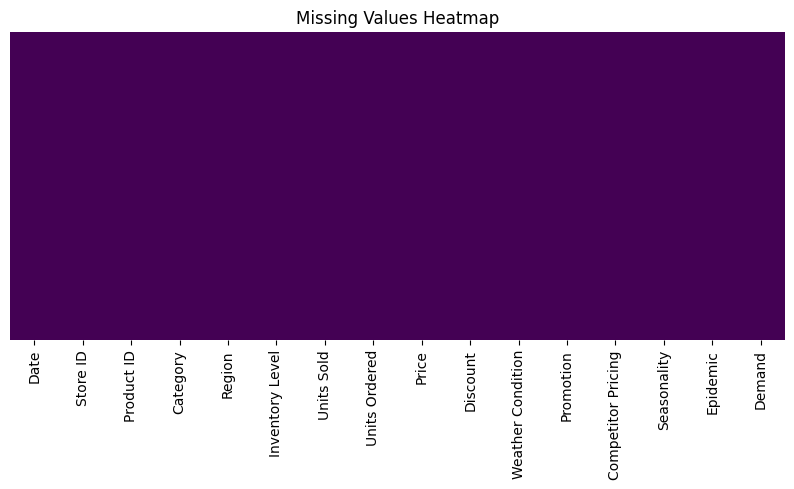

In [16]:
# Inspect missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


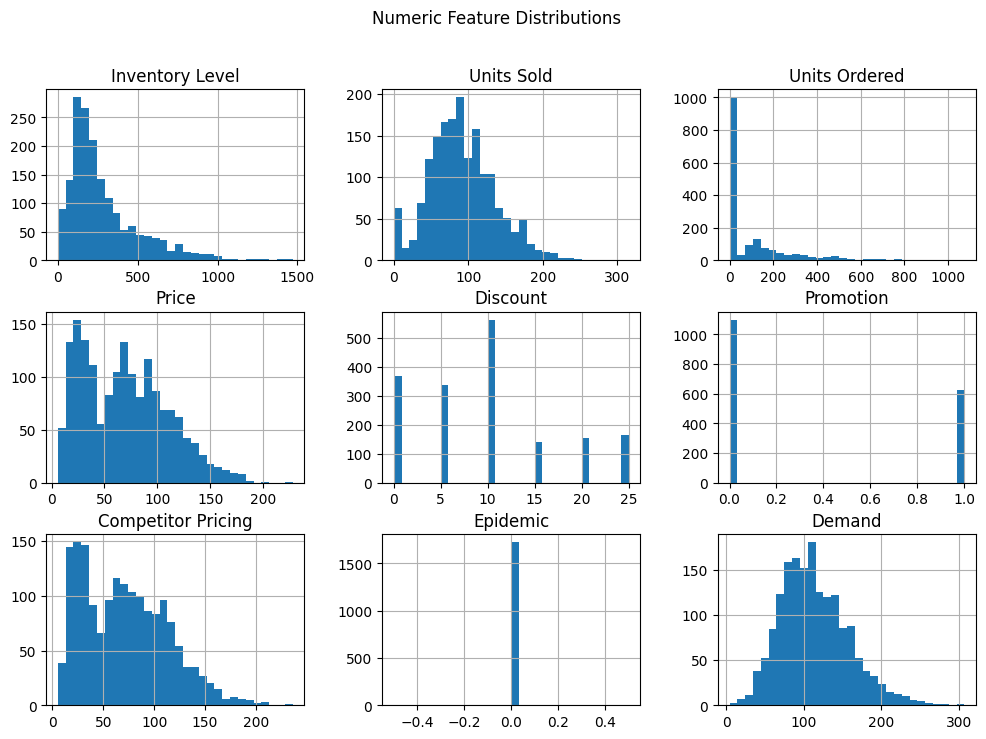

In [17]:
# Visualize distributions for numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle('Numeric Feature Distributions')
plt.show()

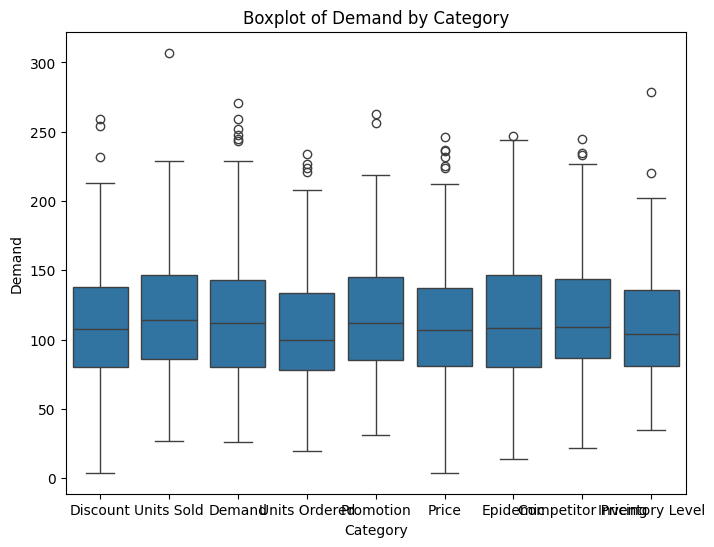

In [18]:
# generate boxplots to each distribution
# Boxplot of 'Demand' for each category
df['Category'] = np.random.choice(numeric_cols, size=len(df))

plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Demand', data=df)
plt.title('Boxplot of Demand by Category')
plt.xlabel('Category')
plt.ylabel('Demand')
plt.show()

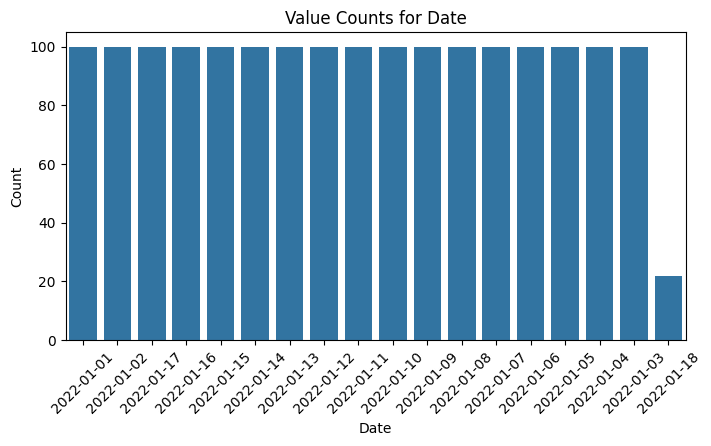

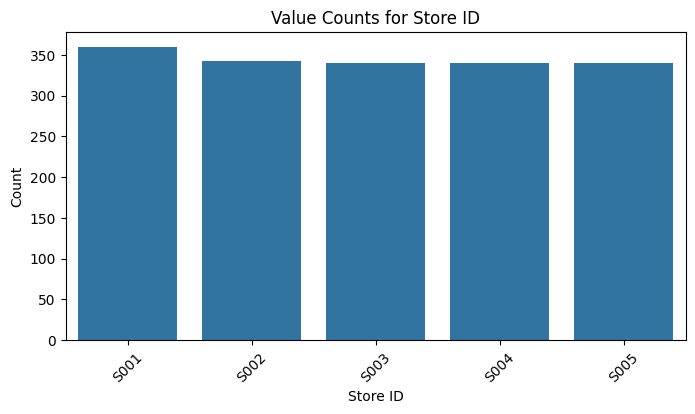

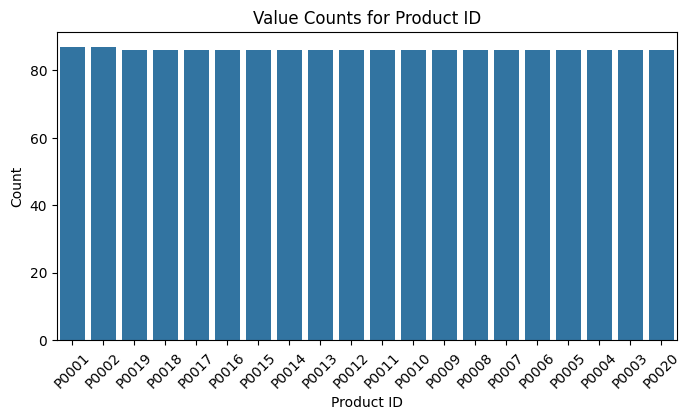

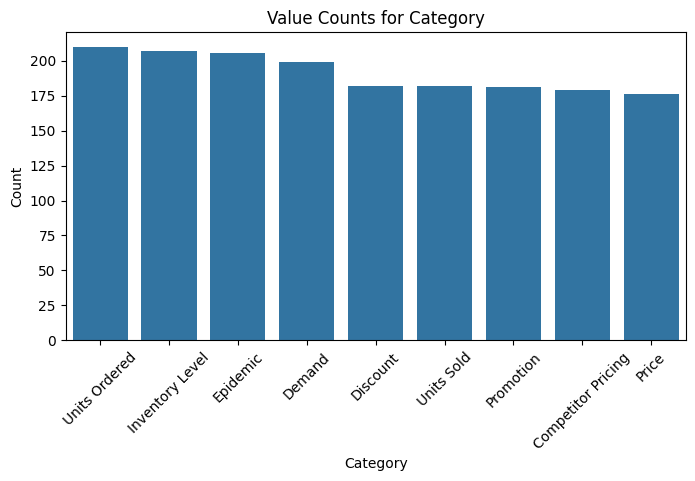

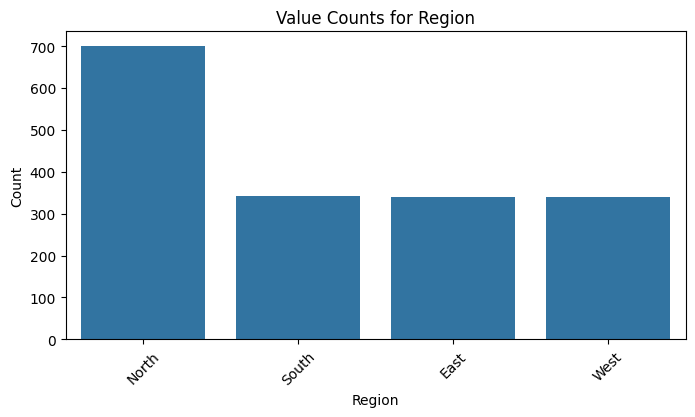

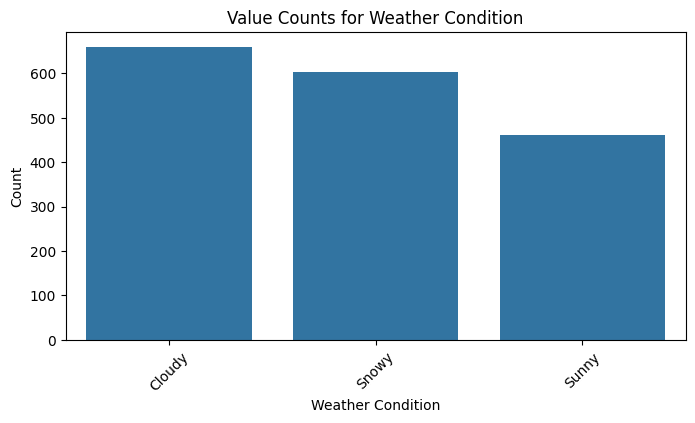

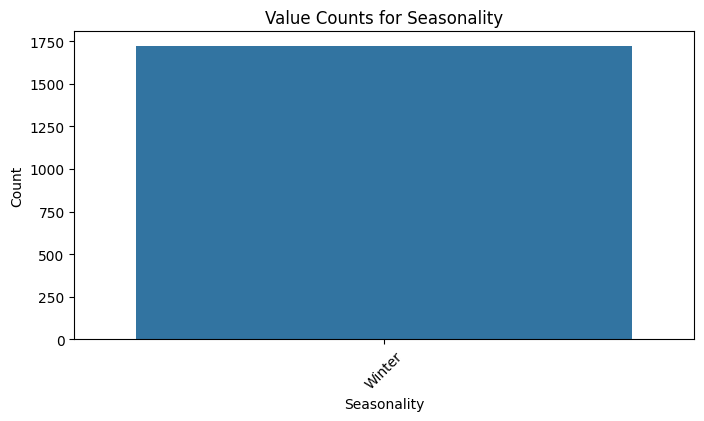

Number of distinct dates: 18
Date
2022-01-01    100
2022-01-02    100
2022-01-17    100
2022-01-16    100
2022-01-15    100
2022-01-14    100
2022-01-13    100
2022-01-12    100
2022-01-11    100
2022-01-10    100
2022-01-09    100
2022-01-08    100
2022-01-07    100
2022-01-06    100
2022-01-05    100
2022-01-04    100
2022-01-03    100
2022-01-18     22
Name: count, dtype: int64


In [25]:
# Data exploration for non-numeric (categorical) columns

# Select non-numeric columns
categorical_cols = df.select_dtypes(exclude='number').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

distinct_dates = df['Date'].nunique()
print(f"Number of distinct dates: {distinct_dates}")

date_counts = df['Date'].value_counts()
print(date_counts)

We dont have all the data form every store at the 18.01.2024. 

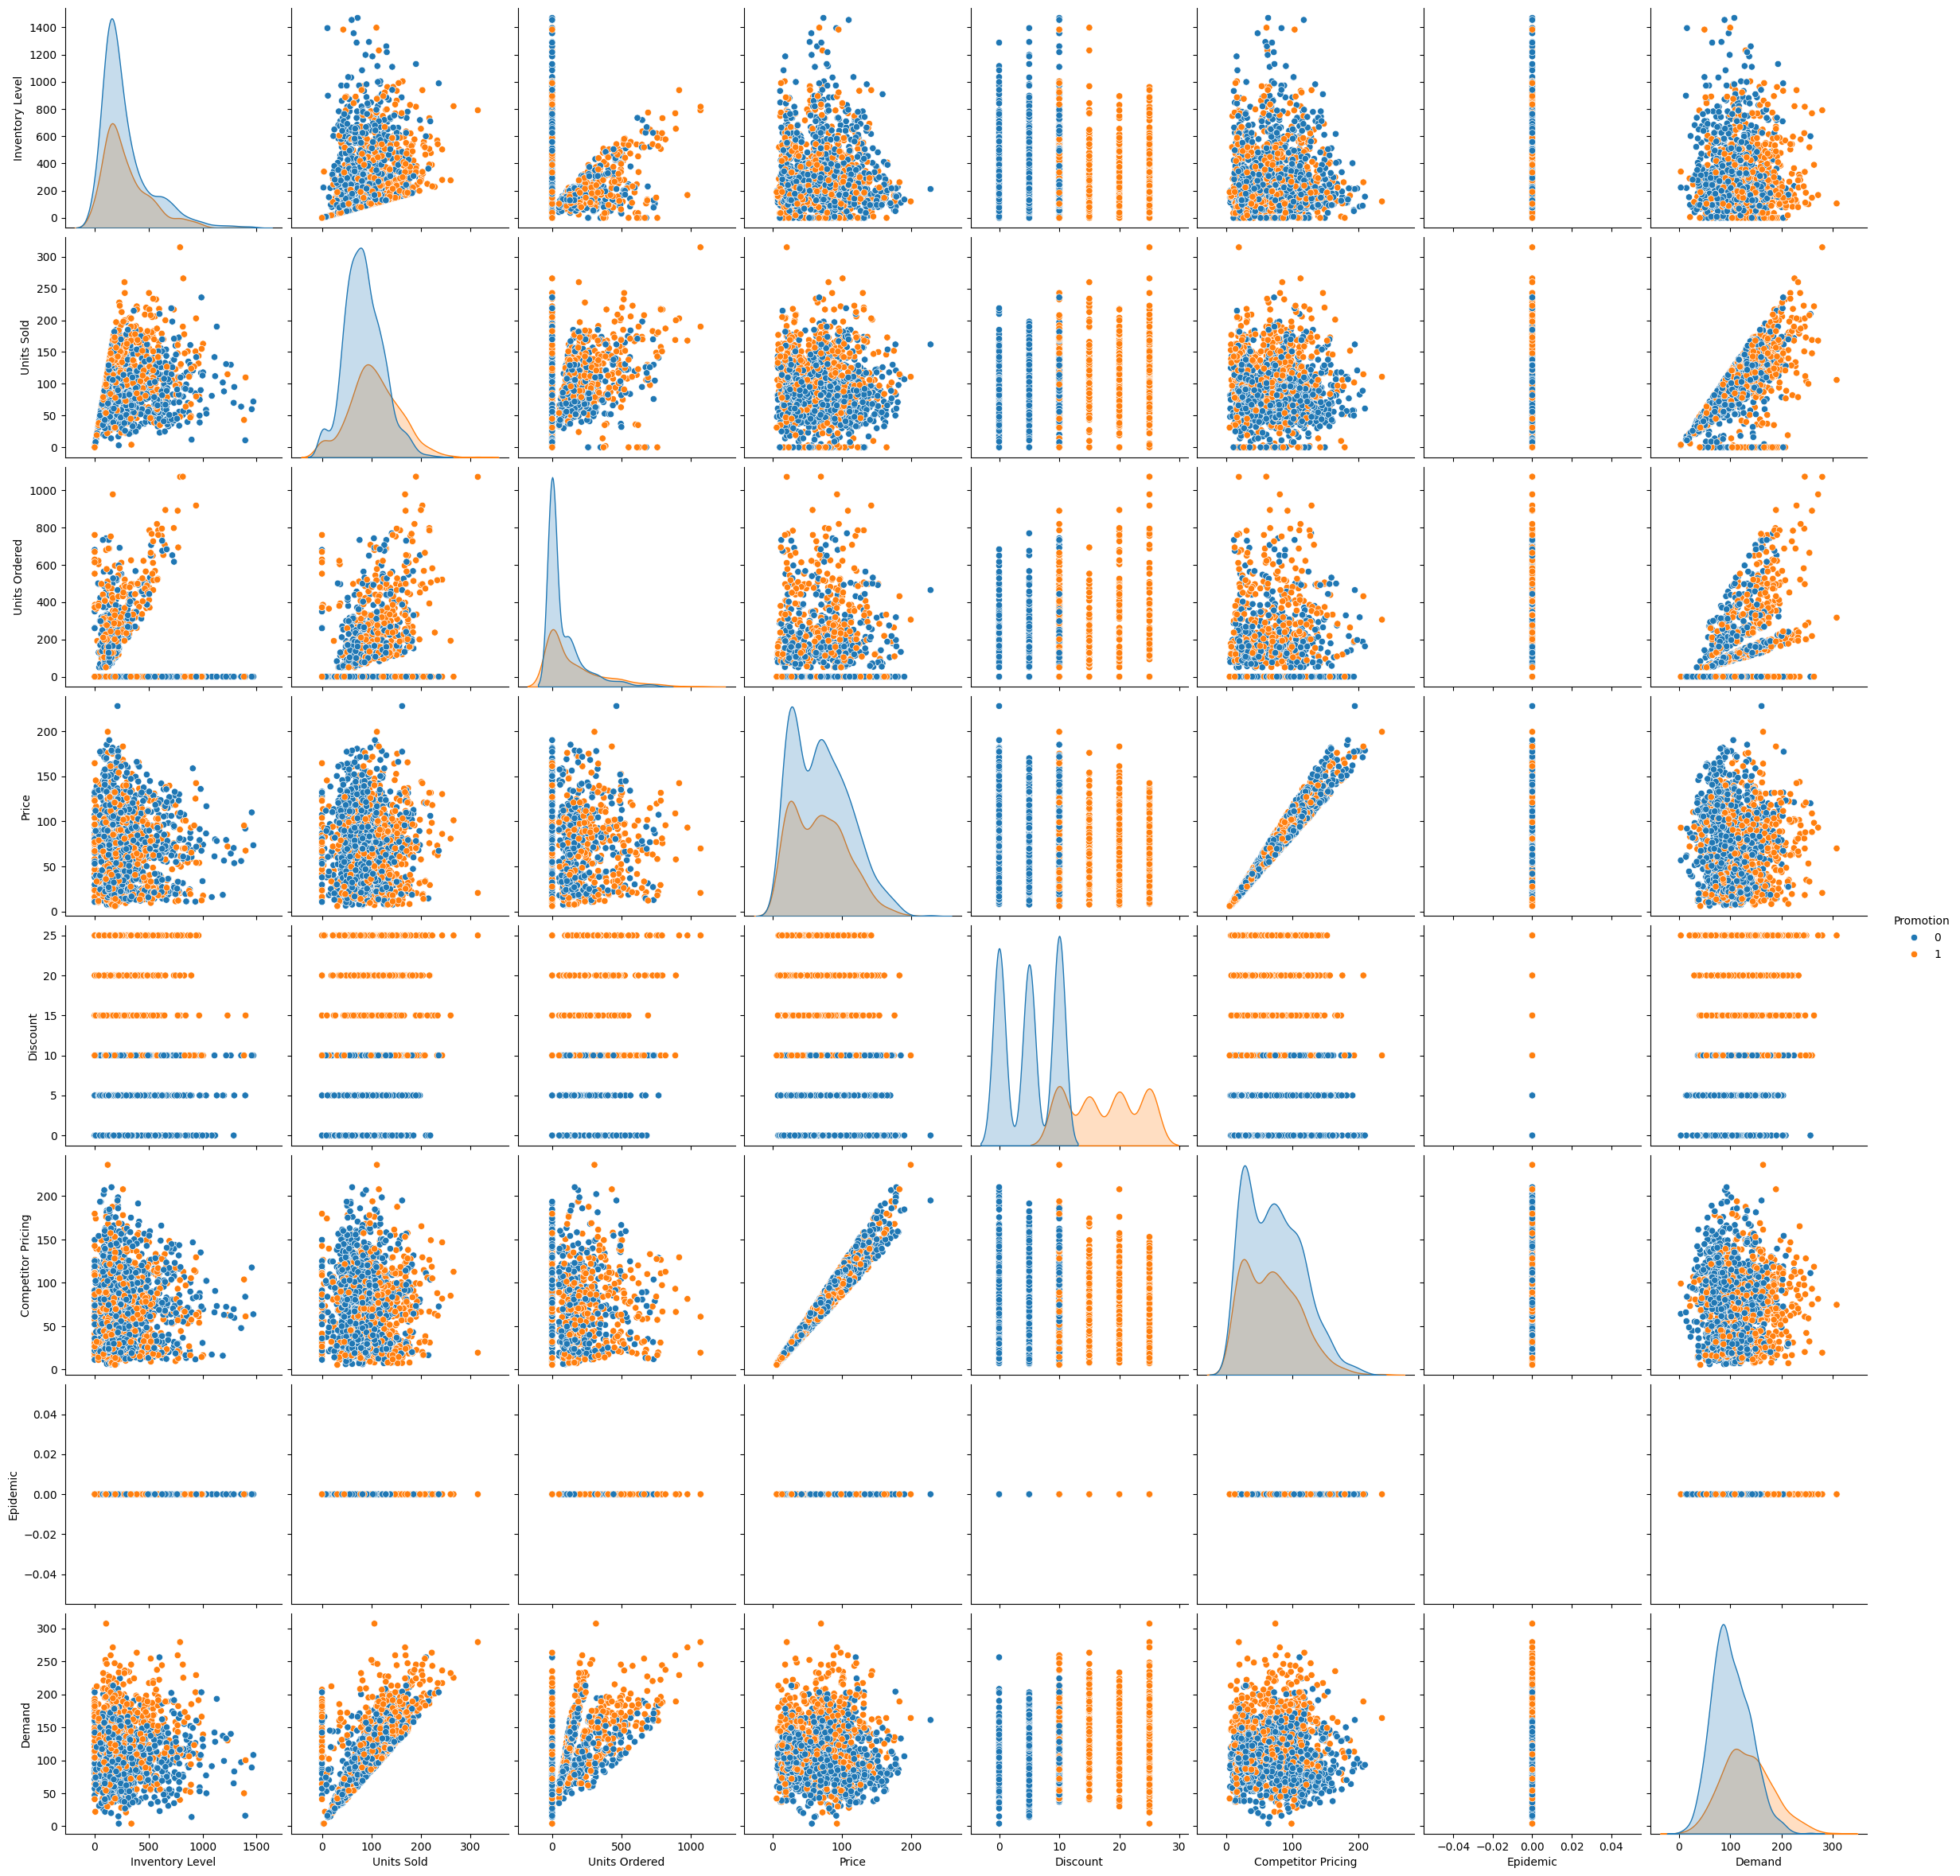

In [20]:
# Visualize correlations, detect oatterns or clusters and explore how the variables interact with the target variable "salary"
sns.pairplot(df, hue='Promotion', height = 3)

/var/folders/zr/vtmq_rv91w5cxk6wxkcj6c_c0000gn/T/ipykernel_33436/464773435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Promotion', y='Price', data=df, inner='box', palette='Set2')


Text(0.5, 1.0, 'Promotion x Price')

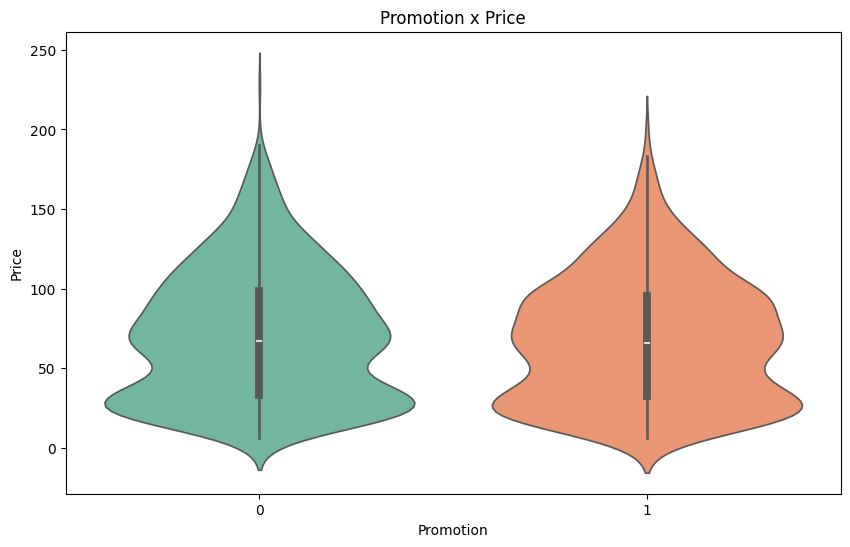

In [21]:
# We plot some violin plots to get further insights into the relationsship between promotion and price
plt.figure(figsize=(10,6))
sns.violinplot(x='Promotion', y='Price', data=df, inner='box', palette='Set2')
plt.title('Promotion x Price')

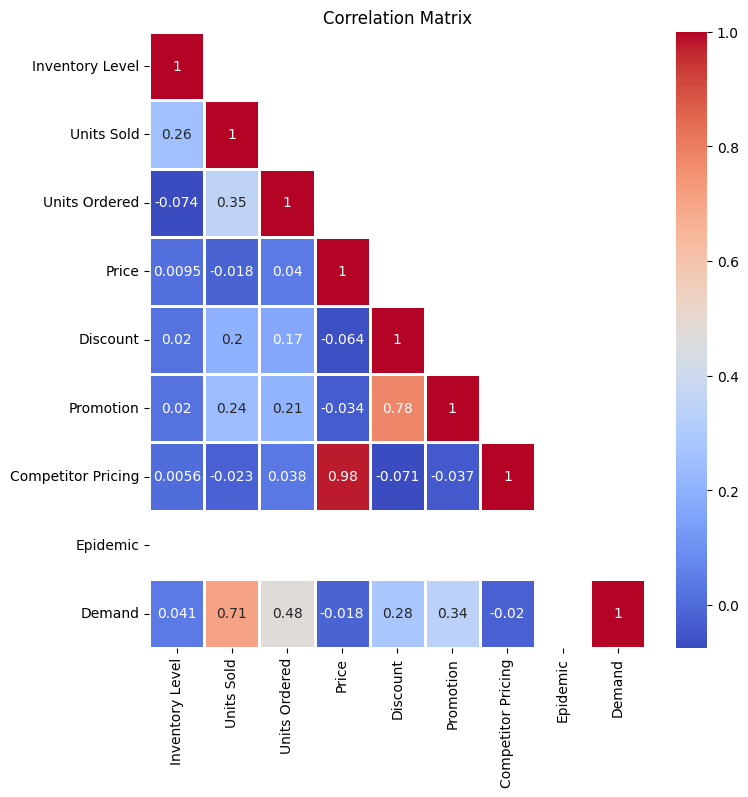

In [22]:
# We check if there is any leads between Promotion and a specific product
# We calculate the correlation between all metric scaled attributes to evaluate if we can drop anything in the next part
corr = df[numeric_cols].corr()
plt.figure(figsize=(8, 8)) 
mask = np.triu(corr, k=1)
sns.heatmap(corr, annot=True, linewidths=1, mask=mask, cmap='coolwarm')  
plt.title('Correlation Matrix')
plt.show()

Looking at all the Data and going trough there are no wrong or missing values, therefore we can go ahead with the data processing. We gained a lot of insights into the data and how they are correlated which will help us in our Data Processing. Interesting are the correlations between Price and competitor price since they are changing almost everytime the price is changing. The Stores are relativly eavenly distributed and therefore the data is great to train and test. Looking at the data more specific it is interesting to note that every product is only consistence in each store. The stores label their Products diffrently so we will need to make a key out of it in order to give a good advice on promoting a specific product.